<a href="https://colab.research.google.com/github/Raushan787/Well_Log_Visual/blob/main/Well_Log_Calculation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
#Load the data using Lasio
!pip install lasio
import lasio
log_data=lasio.read("L0509_comp.las")

**Data Analysis and Visualisation**

In [12]:
#mnemonics of the well logs
log_data.keys()


['DEPT', 'GR', 'DT', 'RHOB', 'DRHO', 'NPHI']

In [13]:
# Display mnemonics of well log
log_data.curves

[CurveItem(mnemonic="DEPT", unit="M", value="", descr="1     Index curve", original_mnemonic="DEPT", data.shape=(47988,)),
 CurveItem(mnemonic="GR", unit="GAPI", value="", descr="2     Gamma Ray", original_mnemonic="GR", data.shape=(47988,)),
 CurveItem(mnemonic="DT", unit="US/F", value="", descr="3     Acoustic Compressional Slowness - DTC", original_mnemonic="DT", data.shape=(47988,)),
 CurveItem(mnemonic="RHOB", unit="G/C3", value="", descr="4     Bulk Density", original_mnemonic="RHOB", data.shape=(47988,)),
 CurveItem(mnemonic="DRHO", unit="G/C3", value="", descr="5     Density Correction", original_mnemonic="DRHO", data.shape=(47988,)),
 CurveItem(mnemonic="NPHI", unit="V/V", value="", descr="6     Neutron Porosity", original_mnemonic="NPHI", data.shape=(47988,))]

In [15]:
# Access the data
depth=log_data["DEPT"]
gr=log_data["GR"]
dt=log_data["DT"]
rhob=log_data["RHOB"]
drho=log_data["DRHO"] #density correction
nphi=log_data["NPHI"]

(4879.7006, 81.0)

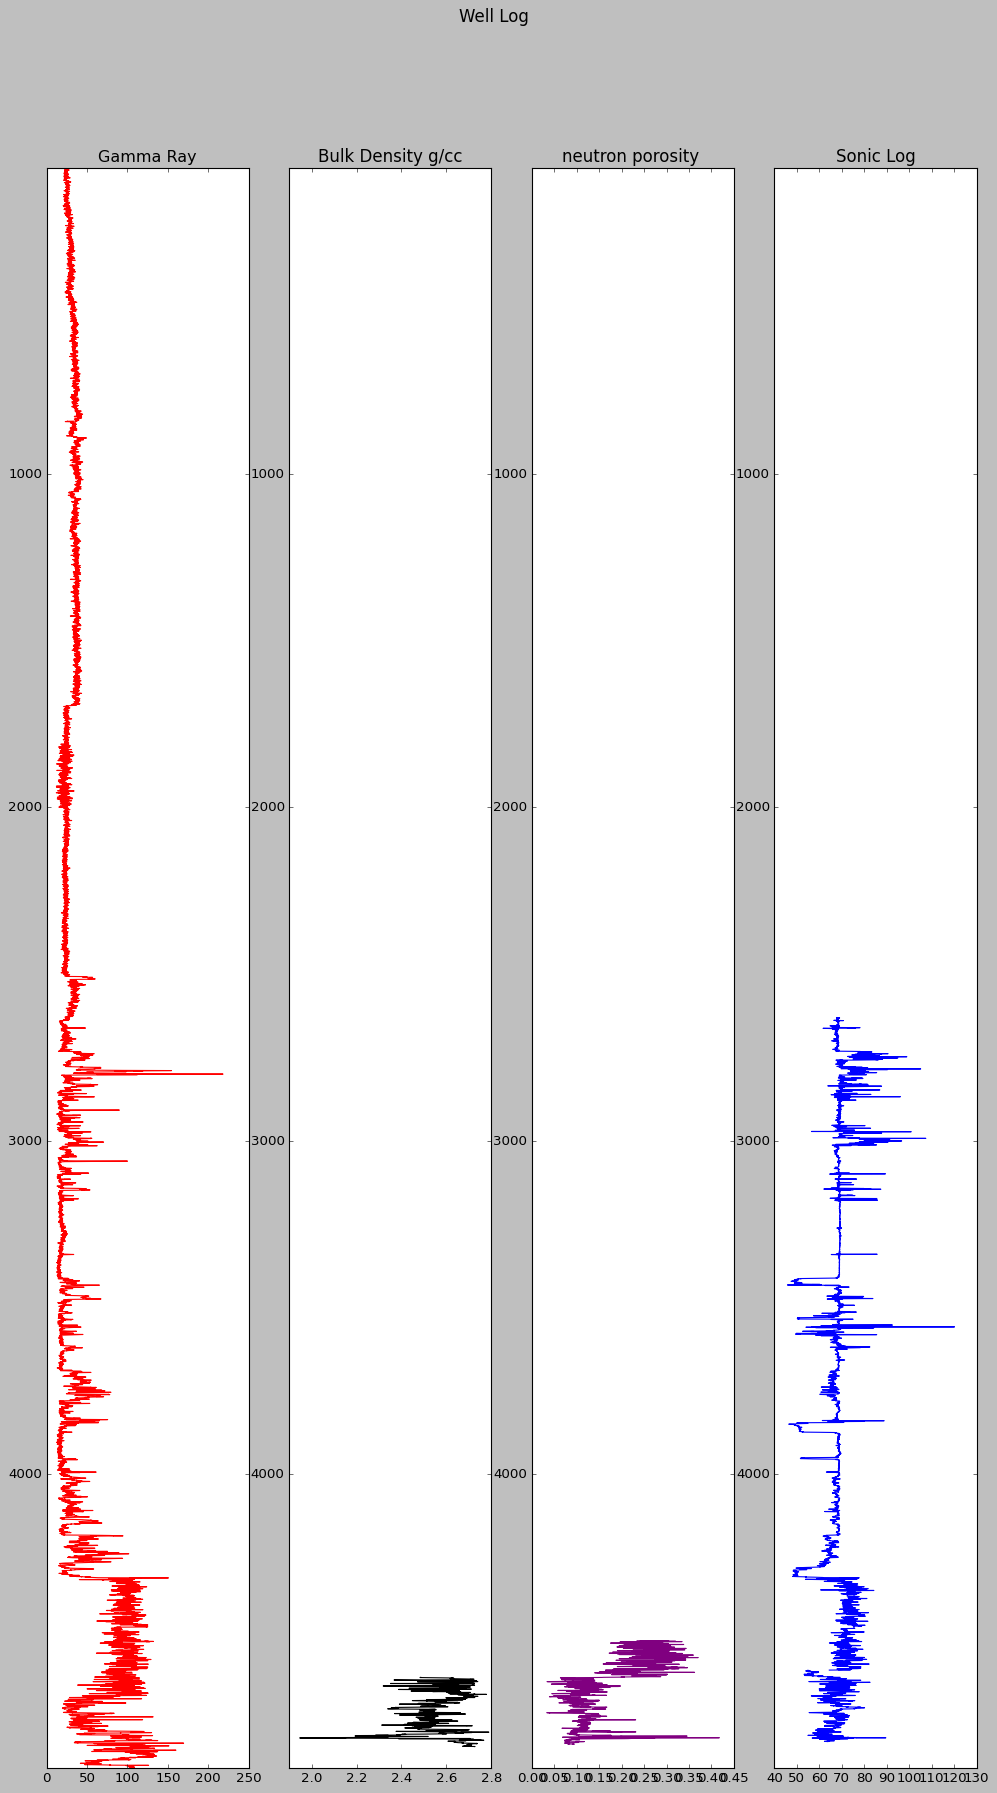

In [48]:
## Visualize well logs using for loop and subplots: GR,NPHI, RHOB, DTC
plt.style.use("classic")
plt.figure(figsize=(15,25))
plt.suptitle("Well Log ", size =15)

plt.subplot(1,4,1)
plt.plot(gr,depth,color="red")
plt.title("Gamma Ray")
plt.ylim(max(depth),min(depth))

plt.subplot(1,4,2)
plt.plot(rhob,depth,color="black")
plt.title("Bulk Density g/cc",size=15)
plt.ylim(max(depth),min(depth))

plt.subplot(1,4,3)
plt.plot(nphi,depth,"purple")
plt.title("neutron porosity ",size=15)
plt.ylim(max(depth),min(depth))

plt.subplot(1,4,4)
plt.plot(dt,depth,color="blue")
plt.title("Sonic Log",size=15)
plt.ylim(max(depth),min(depth))


For Better Visualisation and due to data available limit the from 2500 to 5000

(4879.7006, 4500.0)

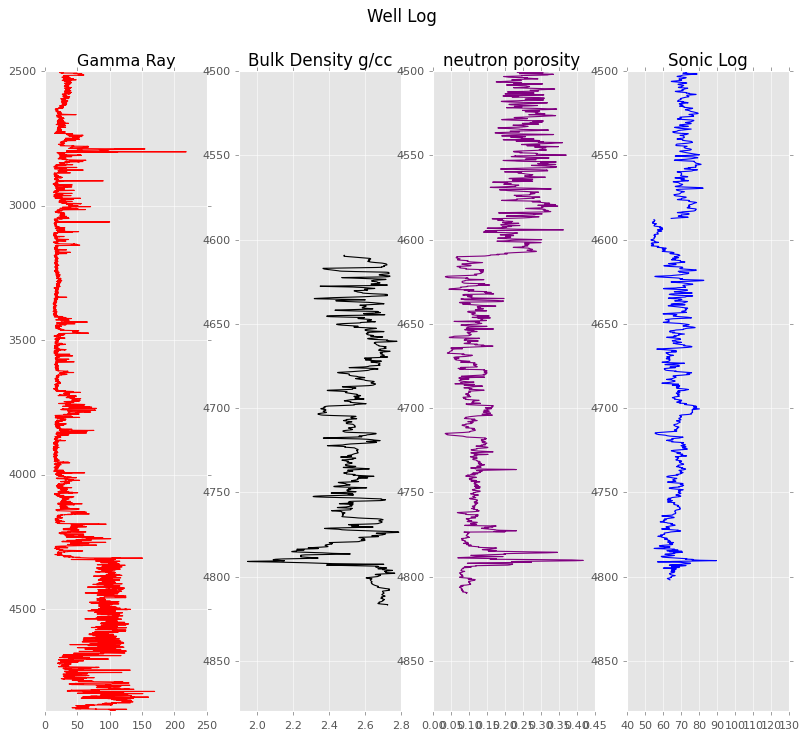

In [51]:
plt.style.use("ggplot")
plt.figure(figsize=(12,10))
plt.suptitle("Well Log ", size =15)

plt.subplot(1,4,1)
plt.plot(gr,depth,color="red")
plt.title("Gamma Ray")
plt.ylim(max(depth),2500)

plt.subplot(1,4,2)
plt.plot(rhob,depth,color="black")
plt.title("Bulk Density g/cc",size=15)
plt.ylim(max(depth),4500)

plt.subplot(1,4,3)
plt.plot(nphi,depth,"purple")
plt.title("neutron porosity ",size=15)
plt.ylim(max(depth),4500)

plt.subplot(1,4,4)
plt.plot(dt,depth,color="blue")
plt.title("Sonic Log",size=15)
plt.ylim(max(depth),4500)

**Crossploting log**

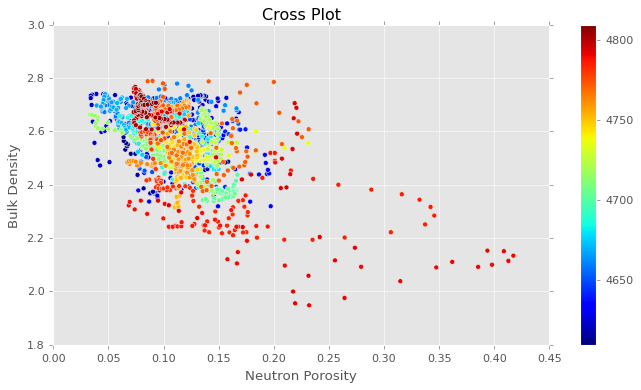

In [53]:
#Crossplot of bulk density and neutron porosity
plt.style.use("ggplot")
plt.figure(figsize=(10,5))
plt.scatter(nphi,rhob,c=depth)
plt.ylabel("Bulk Density")
plt.xlabel("Neutron Porosity")
plt.colorbar()
plt.title("Cross Plot")
plt.show()

**DT TO VP Log**

dt->us/m

VP-->m/s

<ipython-input-55-aa8814ac23c9>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


(4879.7006, 2600.0)

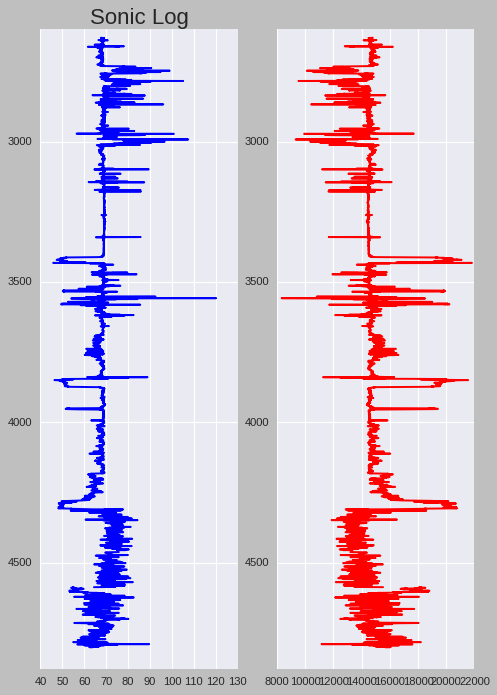

In [55]:
#Convert the data
vp=np.power(10,6)/dt

plt.figure(figsize=(7,10))
plt.style.use("seaborn")
plt.subplot(1,2,1)
plt.plot(dt,depth,color="blue")
plt.title("Sonic Log",size=20)
plt.ylim(max(depth),2600)

plt.subplot(1,2,2)
plt.plot(vp,depth,color="red")
plt.title("",size=20)
plt.ylim(max(depth),2600)

$$**Shale   volume   Calculation**$$

**Vsh=(GR - GRmin)/(GRmax-GRmin)**

In [56]:
#Find min and max reading of gamma log
np.min(gr) ,np.max(gr)

(12.019911, 218.201477)

In [57]:
#Removes the nan values
def fillnan(log):
  log_nan_remove=log[~np.isnan(log)]
  mean=np.mean(log_nan_remove)
  log[np.isnan(log)]=mean
  return log

#Fill the nan values with mean values
gr_imputed=fillnan(gr)

#access the minimum and maximum values
np.min(gr) , np.max(gr)

(12.019911, 218.201477)

In [58]:
#volume of shale:-
gr_min=np.min(gr_imputed)
gr_max=np.max(gr_imputed)

vsh=(gr_imputed-gr_min)/(gr_max-gr_min)

<ipython-input-60-8c6c26a4efc3>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


(4879.7006, 2600.0)

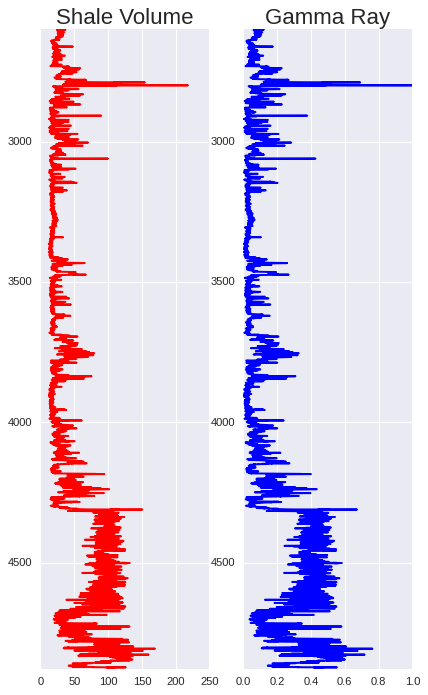

In [60]:
#subplot of shale volume and gamma ray data
plt.figure(figsize=(6,10))
plt.style.use("seaborn")
plt.subplot(1,2,1)
plt.plot(gr,depth,color="red")
plt.title("Shale Volume",size=20)
plt.ylim(max(depth),2600)

plt.subplot(1,2,2)
plt.plot(vsh,depth,color="blue")
plt.title("Gamma Ray",size=20)
plt.ylim(max(depth),2600)


**Calculation Density porosity using bulk density**



In [61]:
#lets assume
#matrix density is 2.67 g/cc
#fluid density =1g/cc
denma=2.67
rhof=1

#calculation
dphi=(denma-rhob)/(denma-rhof)


<ipython-input-63-e50231918883>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


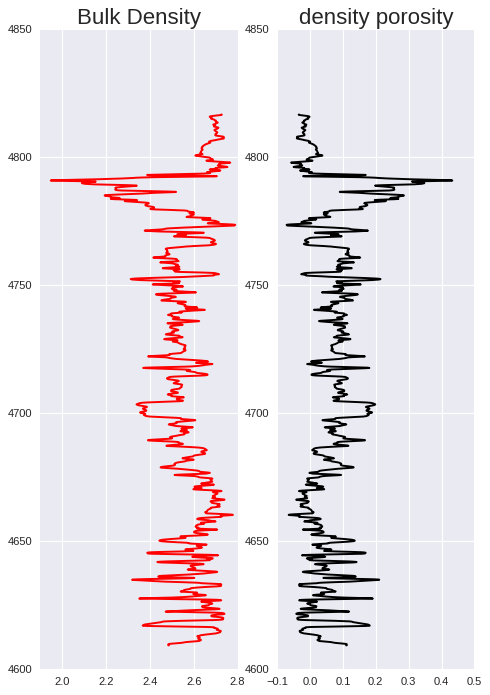

In [63]:
#Subplot of bulk density and density porosity
plt.figure(figsize=(7,10))
plt.style.use("seaborn")
plt.subplot(1,2,1)
plt.plot(rhob,depth,color="red")
plt.title("Bulk Density",size=20)

plt.subplot(1,2,2)
plt.plot(dphi,depth,color="black")
plt.title("density porosity",size=20)
plt.show()